In [4]:
#分析1912年泰坦尼克号乘客的生存率影响因素
# 1. 导入库
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
# 2. 加载数据
train = pd.read_csv('C:/Users/26360/Desktop/titanic-data/train.csv')
test = pd.read_csv('C:/Users/26360/Desktop/titanic-data/test.csv')

In [6]:
# 3. 查看数据前5行 。p类表示社会经济地位的代理。帕奇：父母和子女
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [7]:
# 4. 数据清洗
# 删除无用列
train.drop(['PassengerId', 'Name', 'Ticket', 'Cabin'], axis=1, inplace=True)

In [8]:
# 填充年龄缺失值
train.fillna(train['Age'].median(), inplace=True)
#填充年龄缺失值（这个不对）在一个表达式中连续调用多个方法中使用 inplace=True 参数。在Pandas中，这种做法在未来的版本（3.0及以后）中将不再有效，因为中间对象不会保存对原始对象的更改。
#train['Age'].fillna(train['Age'].median(), inplace=True)

In [9]:
# 转换性别为数字
train['Sex'] = train['Sex'].map({'male':0, 'female':1})

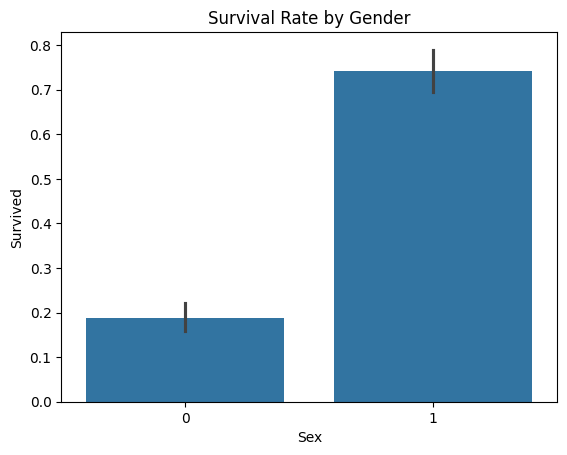

In [10]:
# 5. 可视化分析
# 生存率与性别关系。                Seaborn库用于制作统计图形。Matplotlib库用于绘制图表和可视化数据。
sns.barplot(x='Sex', y='Survived', data=train)
plt.title('Survival Rate by Gender')
plt.savefig('gender_survival.png')  # 保存图片

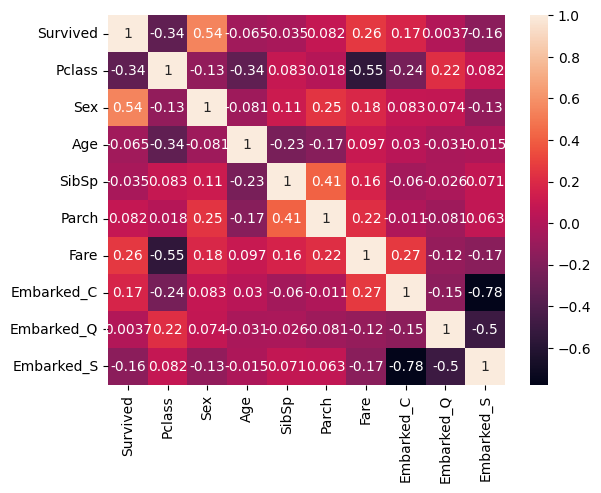

In [11]:
# 将分类数据转换为数值
train = pd.get_dummies(train, drop_first=True)

#6， 特征相关行分析（计算并可视化一个数据集中各个特征之间的相关性）
corr = train.corr()
sns.heatmap(corr, annot=True)
plt.savefig('correlation.png')

In [2]:
# 7. 简单预测模型（随机森林）
from sklearn.ensemble import RandomForestClassifier

In [13]:
# 准备特征和标签
X = train[['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare']]
y = train['Survived']

In [14]:
# 训练模型
model = RandomForestClassifier()
model.fit(X, y)

RandomForestClassifier()

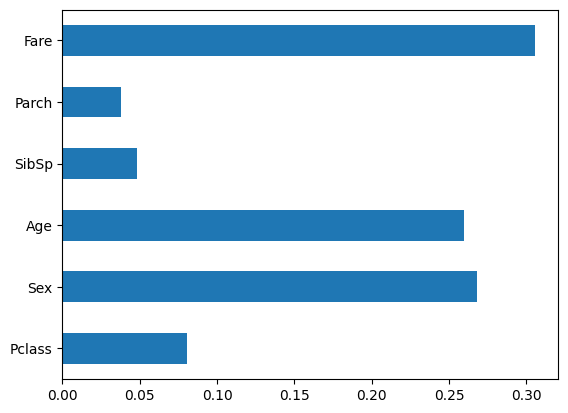

In [15]:
# 查看特征重要性
pd.Series(model.feature_importances_, index=X.columns).plot(kind='barh')
plt.savefig('feature_importance.png')

In [ ]:
#从图表中可以看出，Fare特征的重要性最高，其次是Age和Sex。
#随机森林是一种集成学习方法，主要用于分类、回归和其他任务，属于监督学习的一种。它由多个决策树组成，通过构建多棵决策树并对它们的预测结果进行汇总来提高模
#型的准确性和鲁棒性。随机森林可以被认为是“众多智慧胜于一人”的体现，即通过组合多个模型的预测结果来获得比单个模型更好的性能。
